In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

(3, 106, 63)
(3, 62, 46)
(3, 29, 22)
(3, 46, 34)
(3, 29, 29)
(3, 287, 167)


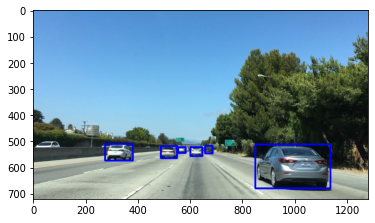

In [17]:
# All the 6 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    imcopy = np.copy(img)
    # Define an empty list to take bbox coords
    bbox_list = []
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        templ = mpimg.imread(temp)
        print(templ.shape[::-1])
        l, w, h = templ.shape[::-1]
        # Use cv2.matchTemplate() to search the image
        #     using whichever of the OpenCV search methods you prefer
        #meth = 'cv2.TM_SQDIFF' # --> Not working
        meth = 'cv2.TM_CCOEFF'  # --> Working
        #meth = 'cv2.TM_CCOEFF_NORMED' # --> Working
        #meth = 'cv2.TM_CCORR'  # --> Not working
        #meth = 'cv2.TM_CCORR_NORMED'   # --> Working
        #meth = 'cv2.TM_SQDIFF'  # --> Not working
        #meth = 'cv2.TM_SQDIFF_NORMED'   # --> Not working
        
        method = eval(meth)
        res = cv2.matchTemplate(img,templ,method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
            
        # Determine bounding box corners for the match
        if meth in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        bbox_list.append((top_left,bottom_right))
    # Return the list of bounding boxes
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)